# Document Alignment

This notebook will teach you about:
* Morphology
* Canny Edge Detection
* Contours
* Corner Detection using Douglas-Peucker algorithm
* Homography
* Perspective Transform

You will learn to perform document alignment using the above techniques.

### Numpy 
NumPy is the fundamental package needed for scientific computing with Python. <br>
[For more info...](https://numpy.org/doc/stable/reference/index.html)

### Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. <br>
[For more info...](https://matplotlib.org)
### OpenCV
OpenCV or cv2 provides a real-time optimized Computer Vision library, tools, and hardware. It also supports model execution for Machine Learning (ML) and Artificial Intelligence.<br>
[For more info...](https://opencv.org)

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:

img = cv2.imread('inputs/scanned-form.jpg', cv2.IMREAD_COLOR)

<img src = 'inputs/scanned-form.jpg' width = 300>

In [19]:
# Making Copy of original image.
orig_img = img.copy()

# Morphology to get blank page

## Advanced Morphological operations

**`morphologyEx()`** perform advanced morphological transformations using an erosion and dilation as basic operations.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.morphologyEx(	src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)
```

`dst`: Destination image of the same size and type as source image. 

The function has **3 required input argument** and 4 optional flag:

1. `src` Source image. The number of channels can be arbitrary. The depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
2. `op` Type of a morphological operation, see [MorphTypes](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32).
3. `kernal` Structuring element. It can be created using [getStructuringElement](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc).
4. `anchor` Anchor position with the kernel. Negative values mean that the anchor is at the kernel center.
5. `iterations` Number of times erosion and dilation are applied.
6. `borderType` Pixel extrapolation method, see [BorderTypes](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5). BORDER_WRAP is not supported.
7. `borderValue` Border value in case of a constant border. The default value has a special meaning.

### <font color="green">OpenCV Documentation</font>

[**`morphologyEx()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f)<br>
[**`dilute()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c)<br>
[**`erode()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb)<br>

## MORPH_CLOSE
a closing operation

``` python
𝚍𝚜𝚝=close(𝚜𝚛𝚌,𝚎𝚕𝚎𝚖𝚎𝚗𝚝)=erode(dilate(𝚜𝚛𝚌,𝚎𝚕𝚎𝚖𝚎𝚗𝚝))
```


In [20]:
# Repeated Closing operation to remove text from the document.
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations= 3)

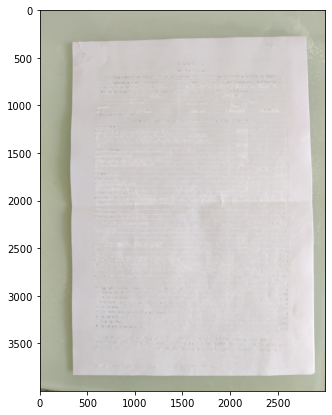

In [21]:
plt.figure(figsize = (10,7))
plt.imshow(img[:,:,::-1])
plt.show()

In [22]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (10,10,img.shape[1]-10,img.shape[0]-10)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

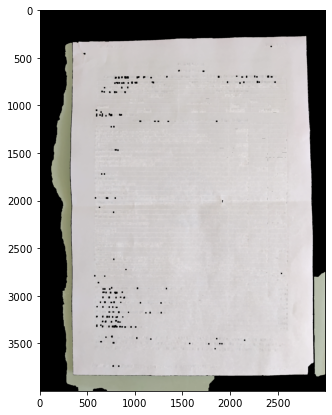

In [23]:
plt.figure(figsize = (10,7))
plt.imshow(img[:,:,::-1])
plt.show()

# Canny Edge Detection and getting Contours for the detected edges.

## Canny Edge Detector

**`Canny()`** finds edges in the input image and marks them in the output map edges using the Canny algorithm.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
edges = cv2.Canny( image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]] )
```
`edges`: output edge map; single channels 8-bit image, which has the same size as image.
The function has **3 required arguments** and 3 optional:

1. `image` 8-bit input image.
2. `threshold1` first threshold for the hysteresis procedure.
3. `threshold2` second threshold for the hysteresis procedure.
4. `apertureSize` aperture size for the Sobel operator.
5. `L2gradient` a flag, indicating whether a more accurate L2 norm should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default L1 norm is enough ( L2gradient=false ).

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.Canny()`**](https://docs.opencv.org/4.5.2/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)


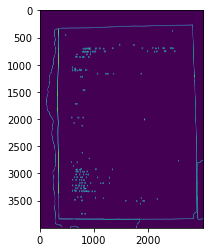

In [24]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
gray = cv2.GaussianBlur(gray, (11, 11), 0)
# Edge Detection.
canny = cv2.Canny(gray, 0, 200)
canny = cv2.dilate(canny, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))
plt.imshow(canny)

## Contour Detection

**`findContours()`** finds contours in a binary image.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
contours, hierarchy = cv2.findContours( image, mode, method[, contours[, hierarchy[, offset]]] )
```
`contours`: Detected contours. Each contour is stored as a vector of points.
`hierarchy`: Optional output vector, containing information about the image topology. It has as many elements as the number of contours. For each i-th contour contours[i], the elements hierarchy[i][0] , hierarchy[i][1] , hierarchy[i][2] , and hierarchy[i][3] are set to 0-based indices in contours of the next and previous contours at the same hierarchical level, the first child contour and the parent contour, respectively. If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements of hierarchy[i] will be negative.

The function has **3 required arguments** and 3 optional:

1. `image` 	Source, an 8-bit single-channel image. 
2. `mode` Contour retrieval mode, see [RetrievalModes](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71).
3. `method` Contour approximation method, see [ContourApproximationModes](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff).
4. `offset` Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.findContours()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a)
<br><br>

## Draw Contour

**`drawContours()`** draws contours outlines or filled contours.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.drawContours( image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]] )
```

The function has **4 required arguments** and 5 optional:

1. `image` 	Destination image.
2. `contours` All the input contours. Each contour is stored as a point vector.
3. `contourIdx` Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
4. `color` Color of the contours.
5. `thickness` Thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.
6. `lineType` Line connectivity. See LineTypes
7. `hierarchy` Optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
8. `maxLevel` Maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is hierarchy available.
9. `offset`	Optional contour shift parameter. Shift all the drawn contours by the specified 𝚘𝚏𝚏𝚜𝚎𝚝=(dx,dy) .


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.drawContours()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)




In [25]:
# Blank canvas.
con = np.zeros_like(img)
# Finding contours for the detected edges.
contours, hierarchy = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Keeping only the largest detected contour.
page = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
con = cv2.drawContours(con, page, -1, (0, 255, 255), 3)

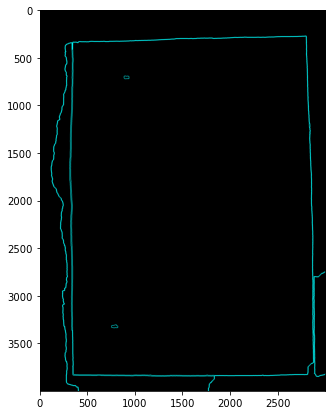

In [26]:
plt.figure(figsize = (10,7))
plt.imshow(con)
plt.show()

# Corner Detection using Douglas-Peucker algorithm

## Contour Perimeter

**`arcLength()`** calculates a contour perimeter or a curve length.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
retval	=	cv.arcLength( curve, closed )
```

The function has **3 required arguments** and 3 optional flags:

1. `curve` 	Input vector of 2D points, stored in std::vector or [Mat](https://docs.opencv.org/4.5.2/d3/d63/classcv_1_1Mat.html).
2. `closed` Flag indicating whether the curve is closed or not.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.arcLength()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga8d26483c636be6b35c3ec6335798a47c)
<br><br>

## Contour Approximation

**`approxPolyDP()`** approximates a polygonal curve(s) with the specified precision.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
approxCurve = cv2.approxPolyDP( curve, epsilon, closed[, approxCurve] )
```
`approxCurve` Result of the approximation. The type should match the type of the input curve.

The function has **3 required arguments**:

1. `curve` 	Input vector of 2D points, stored in std::vector or [Mat](https://docs.opencv.org/4.5.2/d3/d63/classcv_1_1Mat.html).
2. `epsilon` Parameter specifying the approximation accuracy. This is the maximum distance between the original curve and its approximation.
3. `closed` If true, the approximated curve is closed (its first and last vertices are connected). Otherwise, it is not closed.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.approxPolyDP()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c)


### <font style='color:rgb(50,120,230)'>Detected contour is approximated to a quadrilateral, giving the 4 corners.</font>

In [27]:
def order_points(pts):
	'''Rearrange coordinates to order: 
       top-left, top-right, bottom-right, bottom-left'''
	rect = np.zeros((4, 2), dtype='float32')
	pts = np.array(pts)
	s = pts.sum(axis=1)
	# Top-left point will have the smallest sum.
	rect[0] = pts[np.argmin(s)]
    # Bottom-right point will have the largest sum.
	rect[2] = pts[np.argmax(s)]
	
	diff = np.diff(pts, axis=1)
    # Top-right point will have the smallest difference.
	rect[1] = pts[np.argmin(diff)]
    # Bottom-left will have the largest difference.
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect.astype('int').tolist()

[[346, 341], [2789, 275], [2806, 3821], [353, 3826]]


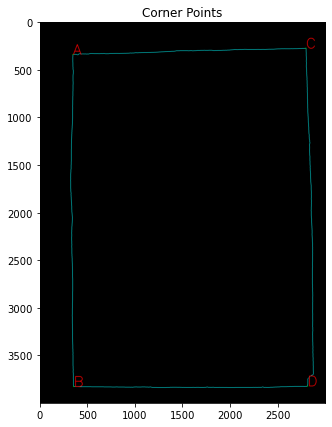

In [28]:
# Blank canvas.
con = np.zeros_like(img)
# Loop over the contours.
for c in page:
	# Approximate the contour.
	epsilon = 0.02 * cv2.arcLength(c, True)
	corners = cv2.approxPolyDP(c, epsilon, True)
	# If our approximated contour has four points
	if len(corners) == 4:
		break
cv2.drawContours(con, c, -1, (0, 255, 255), 3)
cv2.drawContours(con, corners, -1, (0, 255, 0), 10)
# Sorting the corners and converting them to desired shape.
corners = sorted(np.concatenate(corners).tolist())

# Displaying the corners.
for index, c in enumerate(corners):
    character = chr(65 + index)
    cv2.putText(con, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 5, cv2.LINE_AA)

# Rearranging the order of the corner points.
corners = order_points(corners)

print(corners)

plt.figure(figsize = (10,7))
plt.imshow(con)
plt.title('Corner Points')
plt.show()

# Finding Destination Co-ordinates

In [29]:
# Finding the maximum width.
w1 = np.sqrt((corners[0][0] - corners[1][0]) ** 2 + (corners[0][1] - corners[1][1]) ** 2)
w2 = np.sqrt((corners[2][0] - corners[3][0]) ** 2 + (corners[2][1] - corners[3][1]) ** 2)
w = max(int(w1), int(w2))
# Finding the maximum height.
h1 = np.sqrt((corners[0][0] - corners[2][0]) ** 2 + (corners[0][1] - corners[2][1]) ** 2)
h2 = np.sqrt((corners[1][0] - corners[3][0]) ** 2 + (corners[1][1] - corners[3][1]) ** 2)
h = max(int(h1), int(h2))
# Final destination co-ordinates.
destination_corners = order_points(np.array([[0, 0], [w - 1, 0], [0, h - 1], [w - 1, h - 1]]))
print(destination_corners)

[[0, 0], [2452, 0], [2452, 4305], [0, 4305]]


# Homography and Perspective Transform

## Homography

**`findHomography()`**  applies a perspective transformation to an image.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
retval, mask = cv2.findHomography( srcPoints, dstPoints[, method[, ransacReprojThreshold[, mask[, maxIters[, confidence]]]]] )
```

The function has **2 required arguments** and 5 optional flags:

1. `srcPoints` Coordinates of the points in the original plane, a matrix of the type CV_32FC2 or vector Point2f .
2. `dstPoints` Coordinates of the points in the target plane, a matrix of the type CV_32FC2 or a vecto
3. `method` Method used to compute a homography matrix. The following methods are possible:
            * 0 - a regular method using all the points, i.e., the least squares method
            * RANSAC - RANSAC-based robust method
            * LMEDS - Least-Median robust method
            * RHO - PROSAC-based robust method
4. `ransacReprojThreshold` Maximum allowed reprojection error to treat a point pair as an inlier (used in the RANSAC and RHO methods only). That is, if <br>
    `||` `dstPoints`<sub>`i`</sub>-`convertPointsHomogeneous`(`H*srcPoints`<sub>`i`</sub>)`||`<sub>`2`</sub>>`ransacReprojThreshold`<br>
then the point i is considered as an outlier. If srcPoints and dstPoints are measured in pixels, it usually makes sense to set this parameter somewhere in the range of 1 to 10.
5. `mask` Optional output mask set by a robust method ( RANSAC or LMeDS ). Note that the input mask values are ignored.
6. `maxIters` The maximum number of RANSAC iterations.
7. `confidence` Confidence level, between 0 and 1.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.warpPerspective()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87)
<br><br>

## Perspective Transform

**`warpPerspective()`**  applies a perspective transformation to an image.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv2.warpPerspective( src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]] )
```
`dst` output image of the same size and type as src.
The function has **3 required arguments** and 3 optional flags:

1. `src` input image.
2. `M` 3×3 transformation matrix.
3. `dsize` size of the output image.
4. `flags` combination of interpolation methods INTER_LINEAR or INTER_NEAREST and the optional flag WARP_INVERSE_MAP, that sets M as the inverse transformation ( 𝚍𝚜𝚝→𝚜𝚛𝚌 ).
5. `borderMode` pixel extrapolation method BORDER_CONSTANT or BORDER_REPLICATE
6. `borderValue` value used in case of a constant border; by default, it equals 0.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`cv2.warpPerspective()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87)



In [30]:
h, w = orig_img.shape[:2]
# Getting the homography.
homography, mask = cv2.findHomography(np.float32(corners), np.float32(destination_corners), method=cv2.RANSAC, ransacReprojThreshold=3.0)
# Perspective transform using homography.
un_warped = cv2.warpPerspective(orig_img, np.float32(homography), (w, h), flags=cv2.INTER_LINEAR)

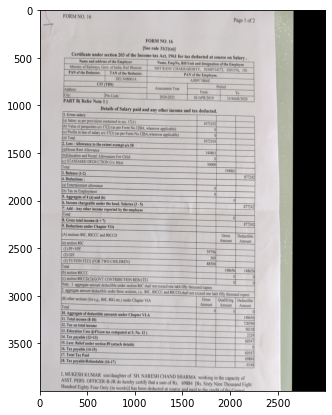

In [31]:
plt.figure(figsize = (10,7))
plt.imshow(un_warped[:,:,::-1])
plt.show()

# Crop

In [32]:
# Cropping the warped image to get only the document.
final = un_warped[:destination_corners[2][1], :destination_corners[2][0]]
cv2.imwrite('grabcutop/aligned.jpg', final)

True

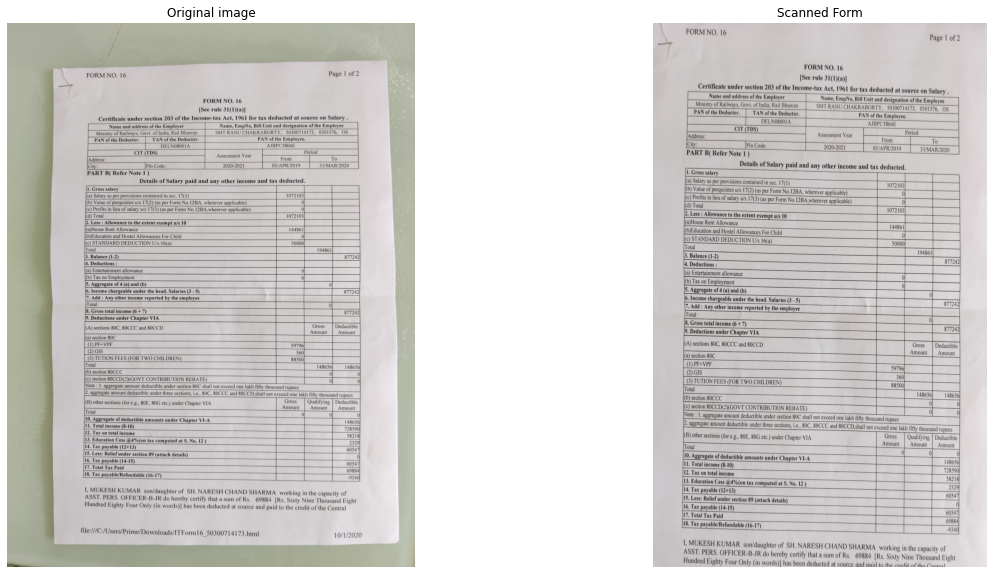

In [33]:
# Display results 
plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.imshow(orig_img[:,:,::-1]); plt.axis('off'); plt.title("Original image")
plt.subplot(122); plt.imshow(final[:,:,::-1]); plt.axis('off'); plt.title("Scanned Form");